In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
data = pd.read_csv("train.csv")
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5 # 0.5 to change the range of random from (0, 1) to (-0.5, 0.5)
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5 # 0.5 to change the range of random from (0, 1) to (-0.5, 0.5)
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    # A = np.exp(Z) / np.sum(np.exp(Z))
    A = np.exp(Z) / sum(np.exp(Z))
    # print(f"Z[0][0]: {Z[0][0]}")
    # print(f"np.exp(Z[0][0]): {np.exp(Z[0][0])}")
    # print(np.exp(Z))
    # print("regular sum: ", sum(np.exp(Z)))
    # print(np.sum(np.exp(Z)))
    return A

def ReLU_derivative(z):
    return (z > 0).astype(float)


def forward_prop(W1, b1, W2, b2, X):
    # print(f"W1 shape: {W1.shape}, X shape: {X.shape}, b1 shape: {b1.shape}.")
    Z1 = W1.dot(X) + b1
    # print(f"Z1 shape: {Z1.shape}")
    A1 = ReLU(Z1)
    # print(f"A1 shape: {A1.shape}")

    # print(f"W2 shape: {W2.shape}, b2 shape: {b2.shape}")
    Z2 = W2.dot(A1) + b2
    # print(f"Z2 shape: {Z2.shape}")
    A2 = softmax(Z2)
    # print(f"A2 shape: {A2.shape}")

    return Z1, A1, Z2, A2

def one_hot(Y):
    print("Y shape: ", Y.shape)
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # Y.max() + 1 is how many output classes we have. 9 + 1 = 10. (0, 1, 2, ..., 9); one_hot_Y is a matrix of Y.size examples; each examples is an array of zeros of size 10
    one_hot_Y[np.arange(Y.size), Y] = 1 # iterating over every example using Y.size, and then class label Y as an index, we set the correct class to 1.
    one_hot_Y = one_hot_Y.T

    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * ReLU_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    # print(f"b1 shape before update params: {b1.shape}")
    b1 = b1 - alpha * db1
    # print(f"b1 shape after update params: {b1.shape}")
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2

    

In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        # print(f"b1 shape after update params: {b1.shape}")
        # if i % 50 == 0:
        if i % 50 == 0:
            print(f"Iteration: {i}")
            print(f"Accuracy: {get_accuracy(get_predictions(A2), Y)}")

    return W1, b1, W2, b2
    
    

In [10]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Y shape:  (41000,)
Iteration: 0
[8 8 0 ... 7 7 7] [2 5 4 ... 2 3 5]
Accuracy: 0.06748780487804878
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)
Y shape:  (41000,)


KeyboardInterrupt: 

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]

    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()

A1 shape: (10, 1)
W2 shape: (10, 10), b2 shape: (10, 1)
Z2 shape: (10, 1)
Prediction:  [4]
Label:  4


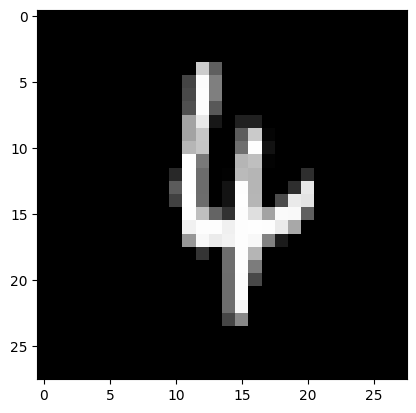

In [ ]:
test_prediction(11, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

A1 shape: (10, 1000)
W2 shape: (10, 10), b2 shape: (10, 1)
Z2 shape: (10, 1000)
[0 0 2 9 1 2 5 2 7 2 4 2 5 4 1 6 2 6 9 7 8 6 5 1 1 9 2 8 3 5 6 3 5 6 4 6 5
 7 1 9 0 0 8 7 0 1 6 2 7 8 4 9 7 0 8 9 0 9 8 5 4 4 7 2 2 6 4 7 0 6 8 6 6 2
 1 3 5 3 1 1 7 1 6 6 6 1 4 8 3 7 4 7 2 4 1 1 8 1 4 0 4 8 4 0 4 0 9 2 0 0 0
 0 9 7 1 1 9 8 9 2 2 6 9 6 3 7 8 1 6 3 7 7 0 6 1 8 9 8 1 1 3 8 1 9 9 4 4 5
 8 6 1 1 1 5 2 7 7 6 0 9 1 9 9 8 1 1 5 9 7 2 6 8 1 9 4 3 2 0 4 5 4 0 8 9 8
 4 5 2 7 0 3 1 6 1 5 6 8 2 8 8 8 8 7 6 5 5 6 1 3 4 5 1 5 2 4 1 0 1 9 7 0 2
 0 0 2 3 5 9 6 7 1 7 4 2 3 0 1 8 3 4 8 8 4 4 0 5 6 0 5 0 6 1 8 2 2 2 4 9 1
 9 3 0 4 9 7 4 8 6 0 0 8 7 8 8 2 4 1 0 9 1 4 7 0 4 7 0 7 2 3 8 6 1 6 8 5 8
 7 0 1 7 6 4 9 1 6 0 2 4 0 4 6 6 1 2 8 5 2 7 4 7 5 4 5 1 5 6 6 7 8 6 3 6 6
 1 9 0 3 4 3 8 0 5 8 1 2 6 5 2 7 5 6 2 9 7 7 5 8 6 7 5 4 9 3 9 9 8 6 3 8 4
 1 6 6 8 5 3 9 8 6 0 1 2 3 3 1 8 1 6 2 2 5 0 5 1 9 0 9 2 7 8 1 7 6 8 3 9 5
 5 7 6 2 1 0 4 0 4 6 3 0 0 4 7 9 7 0 5 8 5 7 8 9 6 1 9 6 9 9 2 1 8 1 1 0 9
 9 0 4 6 0 8 7 1 0 2

np.float64(0.812)

In [ ]:
# # df = pd.read_csv("train.csv")

# # df.replace([np.inf, -np.inf], np.nan, inplace=True)

# # df.dropna(inplace=True)
# # data = df
# # # data.head()
# # data = np.array(data)
# data = np.array(data)
# m, n = data.shape
# np.random.shuffle(data) # shuffle before splitting into dev and training sets

# data_dev = data[0:1000].T
# Y_dev = data_dev[0]
# X_dev = data_dev[1:n]
# X_dev = X_dev / 255.

# data_train = data[1000:m].T
# Y_train = data_train[0]
# X_train = data_train[1:n]
# X_train = X_train / 255.
# _,m_train = X_train.shape



# m,n = data.shape
# np.random.shuffle(data)



# data_dev = data[0:1000].T
# # First row is predictions.
# Y_dev = data_dev[0]
# X_dev = data_dev[1:n]
# X_dev = X_dev / 255
# # print(X_dev)

# data_train = data[1000:m].T
# Y_train = data_train[0]
# X_train = data_train[1:n]
# X_train = X_train / 255


# # print(X_dev.shape)
# print(data_train.shape)
# print(Y_train.shape)
# print(X_train.shape)
# _,m_train = X_train.shape



# def softmax(Z):
#     A = np.exp(Z) / np.sum(np.exp(Z))
#     return A
#     # z_sum = 0
#     # N = z.shape[0]
#     # a = np.zeros((n,))
    
#     # for k in range(N):
#     #     z_sum += np.exp(z[k])

#     # for j in range(N):
#     #     # print(a[j])
#     #     # print(np.exp(z[j]))
#     #     # print(z)
#     #     # print(z[j])
#     #     # print(z_sum)
#     #     a[j] = np.exp(z[j]) / z_sum

#     return a